# Random Forest 1 Year Mortality

In [147]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

%run ImportPlotFunctions.ipynb

## Load data for 1 year Mortality

In [160]:
%run LoadData1Y.ipynb

Loaded 1 Year Train Sample:
X_train shape: (38857, 106)
y shape: (38857,)
Loaded 1 Year Test Sample:
X_test shape: (19139, 106)
y_test shape: (19139,)


## Do a GridCV to find the best RF clasifier

In [87]:
param_grid = {
    'n_estimators' : [400],
    'bootstrap' : [True],
    'max_features' : ['auto'],
    'oob_score' : [True],
    'max_depth' : [30],
    'min_samples_split' : [3],
    'min_samples_leaf' : [1],
}

In [89]:
grid_search = GridSearchCV(
    RandomForestClassifier(
        n_estimators=100,
        max_depth=2,
        random_state=0
    ), 
    param_grid=param_grid, 
    verbose=3,
    scoring='accuracy',
    n_jobs=-1,
    cv=5
).fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   47.1s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


## Analyze Results

In [90]:
best_clf = grid_search.best_estimator_

In [181]:
print("Score: ",best_clf.score(X_test, y_test))

Score:  0.8832749882438999


### Feature Importance

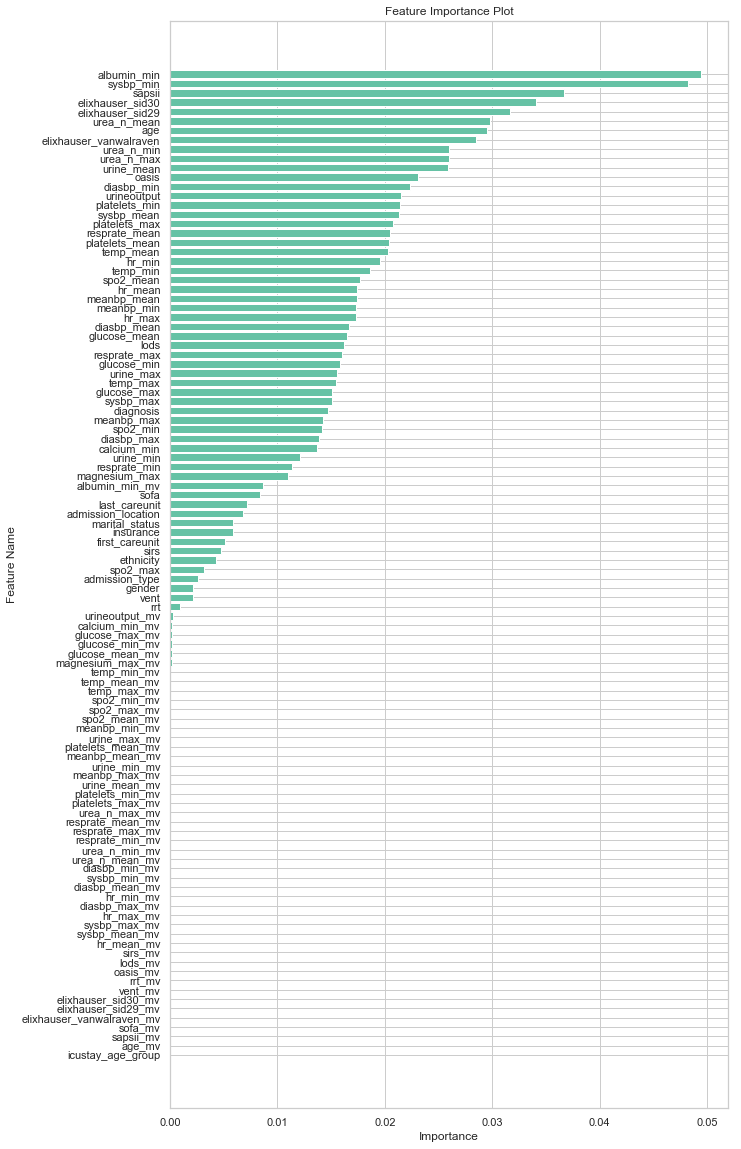

In [175]:
names = X_test.columns.tolist()
values = best_clf.feature_importances_
feature_importance_bar(names, values, figsize=(10, 20))

### Precision Recall Curve

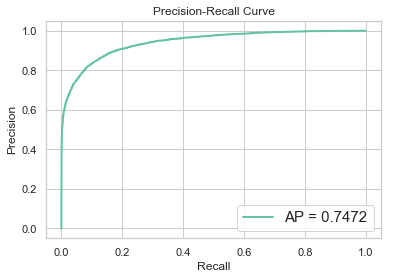

In [166]:
y_score = best_clf.predict(X_test)
average_precision = average_precision_score(y_test, y_score)
y_p = best_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_p)
plot_PRC(tpr, fpr, average_precision)

### ROC Curve

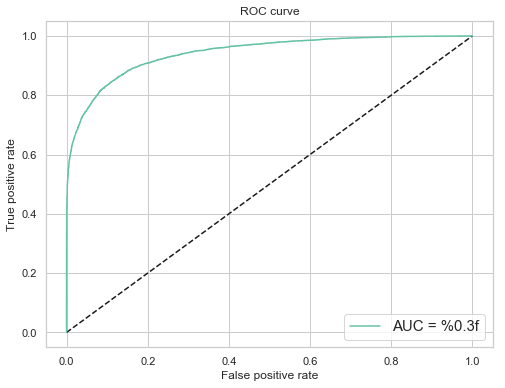

In [179]:
auc = auc(fpr, tpr)
plot_ROC(fpr, tpr, auc)